In [2]:
import numpy as np

# Timing function for multi-processor computing (slide 18 in 01_Introduction PowerPoint)
def t(p, n, a, b): 
  # t Returns computing time
  # Input Parameters:
  # 	p number of processors
  # 	n problem size, i.e. number of elements to sum
  # 	a unit compute time
  # 	b unit communication time
    q = np.log2(p)
    k = np.log2(n)
    if (p < n) :
        return 2*b*q + a*(n/p - 1 + q)
    else :
        return 2*b*(k-1) + a*k 


In [22]:
t(512,1024,1,3), t(1024, 1024, 1, 3)


(64.0, 64.0)

In [23]:
# define speedup for 0, 1, 2, 3 communication time unit, respectively
# q is number of processors

def s_0(q):
    return t(1,1024, 1,0) / t(2**q, 1024, 1,0)
def s_1(q):
    return t(1,1024, 1,1) / t(2**q, 1024, 1,1)
def s_2(q):
    return t(1,1024, 1,2) / t(2**q, 1024, 1,2)
def s_3(q):
    return t(1,1024, 1,3) / t(2**q, 1024, 1,3)

In [24]:
s_3(9), s_3(10),s_3(11)

(15.984375, 15.984375, 15.984375)

In [27]:
x = np.linspace(0, 9, 100)

y3 = [s_3(q) for q in x]
y2 = [s_2(q) for q in x]
y1 = [s_1(q) for q in x]

y0 = []
for q in x:
    y0.append(s_0(q))

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.axis.XTick at 0x2a12de2f070>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '8'),
  Text(4, 0, '16'),
  Text(5, 0, '32'),
  Text(6, 0, '64'),
  Text(7, 0, '126'),
  Text(8, 0, '256'),
  Text(9, 0, '512')])

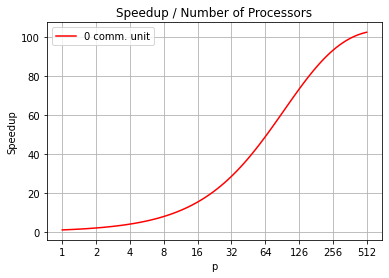

In [16]:
# Plot Speedup vs # of processors for 0 comm.cost (using MATLAB like interface)
plt.plot(x, y0, '-r', label = "0 comm. unit")
plt.ylabel("Speedup")
plt.xlabel("p")
plt.legend()
plt.title("Speedup / Number of Processors")
plt.grid(True)
plt.xticks([0,1,2,3,4,5,6,7,8,9], ['1','2','4','8','16','32','64','126','256','512']) # positions and labels

([<matplotlib.axis.XTick at 0x2a13008d490>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '8'),
  Text(4, 0, '16'),
  Text(5, 0, '32'),
  Text(6, 0, '64'),
  Text(7, 0, '126'),
  Text(8, 0, '256'),
  Text(9, 0, '512')])

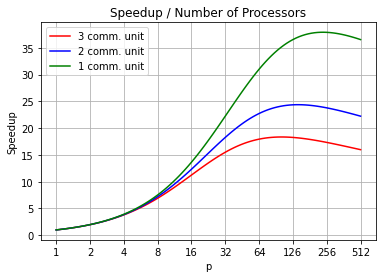

In [19]:
# Plot Speedup vs # of processors for comm. costs 3, 2, and 1 (using MATLAB like interface)
plt.plot(x, y3, '-r', label = "3 comm. unit")
plt.plot(x, y2, '-b', label = "2 comm. unit")
plt.plot(x, y1, '-g', label = "1 comm. unit")
plt.ylabel("Speedup")
plt.xlabel("p")
plt.legend()
plt.title("Speedup / Number of Processors")
plt.grid(True)
plt.xticks([0,1,2,3,4,5,6,7,8,9], ['1','2','4','8','16','32','64','126','256','512']) # positions and labels

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '8'),
 Text(0, 0, '16'),
 Text(0, 0, '32'),
 Text(0, 0, '64'),
 Text(0, 0, '126'),
 Text(0, 0, '256'),
 Text(0, 0, '512')]

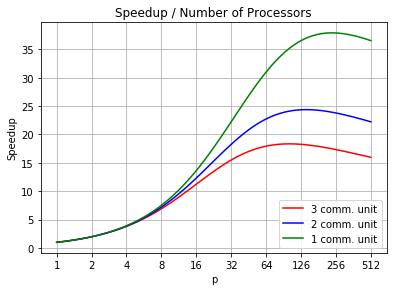

In [9]:
# Like last cell, same plot, but using object-oriented interface 
fig = plt.figure()
ax = fig.add_axes([0.12, 0.12, 0.8, 0.8]) # Give margins for title, labels, tick marks and labels when saving to a file

ax.plot(x, y3, '-r')
ax.plot(x, y2, '-b')
ax.plot(x, y1, '-g')
ax.set_ylabel("Speedup")
ax.set_xlabel("p")
ax.legend(labels = ("3 comm. unit","2 comm. unit","1 comm. unit"), loc = "lower right")
ax.set_title("Speedup / Number of Processors")
ax.grid()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(['1','2','4','8','16','32','64','126','256','512'])

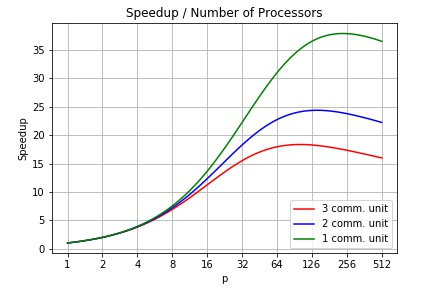

In [10]:
# Save the plot in a local image file
fig.savefig('SpeedUp.jpg')

# To confirm that it contains what we think it contains, let's use the IPython Image object to display the contents
# this file:
from IPython.display import Image
Image('SpeedUp.jpg')

In [11]:
# Efficiency (for n =1024, comm. cost = 3)
def e(q) :
    return (s_3(q) * 100.0) / (2**q)

ex = [0,1,2,3,4,5,6,7,8,9]

ey = []
for q in ex:
    ey.append(e(q))
    
ey

[100.0,
 98.74517374517374,
 95.07434944237917,
 86.40202702702703,
 70.26098901098901,
 48.4375,
 28.042763157894733,
 14.271763392857142,
 6.773040254237288,
 3.1219482421875]

[100.0, 98.7, 95.1, 86.4, 70.3, 48.4, 28.0, 14.3, 6.8, 3.1]

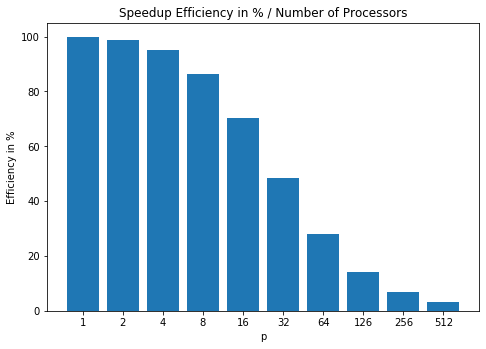

In [12]:
# Efficiency scalability bar plot

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(ex, ey)

ax.set_ylabel("Efficiency in %")
ax.set_xlabel("p")
ax.set_title("Speedup Efficiency in % / Number of Processors")
ax.set_xticks(ex)
ax.set_xticklabels(['1','2','4','8','16','32','64','126','256','512'])

[round(num, 1) for num in ey]

In [13]:
def s_b(q,b):
    return t(1,1024, 1, b) / t(2**q, 1024, 1, b)

x = np.linspace(0, 9, 100)

y10 = [s_b(q,10) for q in x]
y20 = [s_b(q,20) for q in x]
y250 = [s_b(q,250) for q in x]
[(b,s_b(1,b)) for b in range(250, 260, 1)] # speedup = 1 when q = 1, n = 1024, a = 1, and b = 255.5

[(250, 1.0108695652173914),
 (251, 1.0088757396449703),
 (252, 1.0068897637795275),
 (253, 1.0049115913555993),
 (254, 1.0029411764705882),
 (255, 1.0009784735812133),
 (256, 0.9990234375),
 (257, 0.9970760233918129),
 (258, 0.995136186770428),
 (259, 0.9932038834951457)]

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '8'),
 Text(0, 0, '16'),
 Text(0, 0, '32'),
 Text(0, 0, '64'),
 Text(0, 0, '126'),
 Text(0, 0, '256'),
 Text(0, 0, '512')]

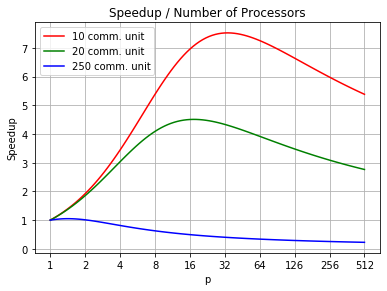

In [14]:
fig = plt.figure()
ax = fig.add_axes([0.12, 0.12, 0.8, 0.8]) # Give margins for title, labels, tick marks and labels when saving to a file

ax.plot(x, y10, '-r')
ax.plot(x, y20, '-g')
ax.plot(x, y250, '-b')
ax.set_ylabel("Speedup")
ax.set_xlabel("p")
ax.legend(labels = ("10 comm. unit", "20 comm. unit", "250 comm. unit"), loc = "upper left")
ax.set_title("Speedup / Number of Processors")
ax.grid()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(['1','2','4','8','16','32','64','126','256','512'])